In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72

import sys
sys.path.insert(0, "..\\utility")
from data_loading import *

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)#

    except RuntimeError as e:
        print(e)

In [3]:
#model = tf.keras.models.load_model(r'saved_models\simulation_psf_0.1')

E:\Anaconda3\envs\hon-tf-2.5.0\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is a Python keyword: 'class'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


(79, 100, 100)
F1 Score:  0.6363636363636365


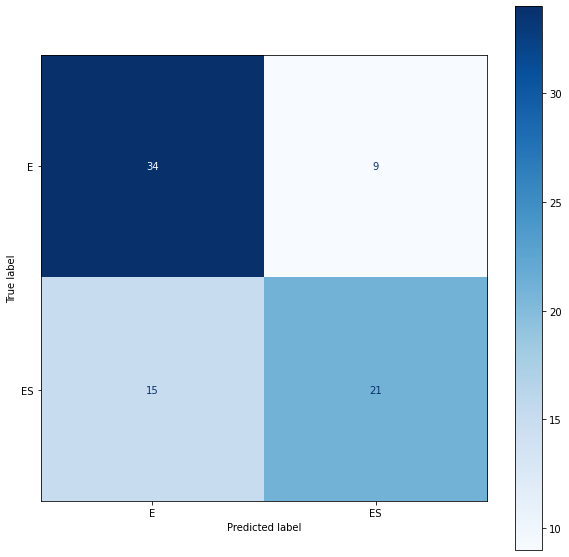

In [4]:
model = tf.keras.models.load_model(r'saved_models\transfer_learning0.5.h5')
x_val, Y_val, metadata = load_hdf5_data(name="califa_s_1.0")
x_val = np.expand_dims(x_val, axis=3)
pr = model.predict(x_val).argmax(axis=1)
from sklearn import metrics
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Y_val, pr), display_labels=['E', 'ES']).plot(cmap='Blues')

print("F1 Score: ", metrics.f1_score(Y_val, pr))